In [2]:
import numpy as np
import pandas as pd

In [3]:
bank_full = pd.read_csv('bank-full.csv', sep=';')
bank = pd.read_csv('bank.csv', sep=';')
bank_additional_full = pd.read_csv('bank-additional-full.csv', sep=';')
bank_additional = pd.read_csv('bank-additional.csv', sep=';')

In [4]:
bank_full.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no


In [5]:
bank.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no


In [6]:
bank_additional_full.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
bank_additional.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no


In [8]:
bank_additional_full.isna().sum() # mengecek data yang kosong

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [9]:
bank_additional.isna().sum() # Mengecek data yang kosong

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [10]:
bank_additional_full.info() # Mengecek type data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [11]:
bank_additional.info()  # Mengecek tipe data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

In [12]:
# Membagi data menjadi data training (X, y) dan data test (X, y)
bank_additional_full_X = bank_additional_full.drop(columns='y')
bank_additional_full_y = bank_additional_full['y']
bank_additional_X = bank_additional.drop(columns='y')
bank_additional_y = bank_additional['y']

bank_full_X = bank_full.drop(columns='y')
bank_full_y = bank_full['y']
bank_X = bank.drop(columns='y')
bank_y = bank['y']

"""
Alasannya adalah 
bank_additional_full adalah suatu data full dan
bank_additional adalah suatu data 10%-nya, jadi 
asumsikan bank_additional_full adalah train dan bank_additional adalah test
"""

'\nAlasannya adalah \nbank_additional_full adalah suatu data full dan\nbank_additional adalah suatu data 10%-nya, jadi \nasumsikan bank_additional_full adalah train dan bank_additional adalah test\n'

In [13]:
# Buat data dummies
bank_additional_full_X_dummies = pd.get_dummies(bank_additional_full_X)
bank_additional_X_dummies = pd.get_dummies(bank_additional_X)
bank_full_X_dummies = pd.get_dummies(bank_full_X)
bank_X_dummies = pd.get_dummies(bank_X)

In [14]:
bank_additional_full_X_dummies.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_no', 'default_unknown', 'default_yes',
       'housing_no', 'housing_unknown', 'housing_yes', 'loan_no',
       'loan_unknown', 'loan_yes', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oc

In [15]:
bank_additional_full_X_dummies.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0


In [16]:
bank_additional_y.head()

0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object

## MODELING

### FUNCTION

In [17]:
def modeling_function(model, bankX = bank_additional_X_dummies, banky = bank_additional_y):
    # Buat hasil prediksi
    predicted = model.predict(bankX)
    print('Data Prediksi : ', predicted)
    
    # Pengecekan akurasi

    data = [
        skmet.accuracy_score(banky, predicted),
        skmet.precision_score(banky, predicted, pos_label='no'),
        skmet.precision_score(banky, predicted, pos_label='yes'),
        skmet.recall_score(banky, predicted,  pos_label='no'),
        skmet.recall_score(banky, predicted,  pos_label='yes'),
    ]

    labels = [
        'Accurate', 'Precision No', 'Precision Yes', 'Recall No', 'Recall Yes'
    ]

    for x in range(5):
        print(labels[x], " : ", data[x])

    print('Confusion Matrix : \n', skmet.confusion_matrix(banky, predicted))
    
    # Buat visualisasi
    import matplotlib.pyplot as plt

    names = labels
    values = data

    plt.figure(figsize=(9, 3))
    plt.title('Check Some Information About Precision, Accuration, Recall')
    plt.xlabel('Calculation')
    plt.ylabel('Score')
    plt.bar(names, values)
    plt.show()
    
    return data

## LOGISTIC REGRESSION

In [18]:
# Buat Logistic Regression
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as skmet
datas = []

C:\Users\inayah\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Data Prediksi :  ['no' 'no' 'no' ... 'no' 'no' 'no']
Accurate  :  0.9145423646516144
Precision No  :  0.9319958311620635
Precision Yes  :  0.6761565836298933
Recall No  :  0.9751908396946565
Recall Yes  :  0.4212860310421286
Confusion Matrix : 
 [[3577   91]
 [ 261  190]]


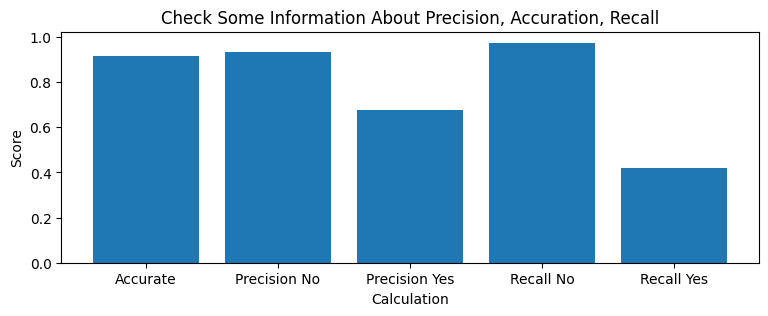

In [19]:
# Buat modelnya
model = LogisticRegression().fit(bank_additional_full_X_dummies, bank_additional_full_y)
datas.append(modeling_function(model))

## K-NEAREST NEIGHBOR

In [20]:
# Buat KNN
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as skmet

C:\Users\inayah\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Data Prediksi :  ['no' 'no' 'no' ... 'no' 'no' 'no']
Accurate  :  0.9310512260257344
Precision No  :  0.9516817939135077
Precision Yes  :  0.7238605898123325
Recall No  :  0.9719193020719739
Recall Yes  :  0.5986696230598669
Confusion Matrix : 
 [[3565  103]
 [ 181  270]]


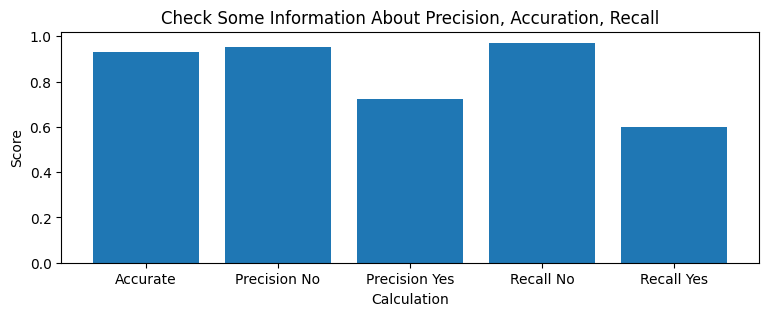

In [21]:
model = KNeighborsClassifier().fit(bank_additional_full_X_dummies, bank_additional_full_y)
datas.append(modeling_function(model))

## SUPER VECTOR MACHINE

In [22]:
from sklearn import svm
import sklearn.metrics as skmet

Data Prediksi :  ['no' 'no' 'no' ... 'no' 'no' 'no']
Accurate  :  0.8852023888520238
Precision No  :  0.8854928017718715
Precision Yes  :  0.6666666666666666
Recall No  :  0.9995
Recall Yes  :  0.007677543186180422
Confusion Matrix : 
 [[3998    2]
 [ 517    4]]


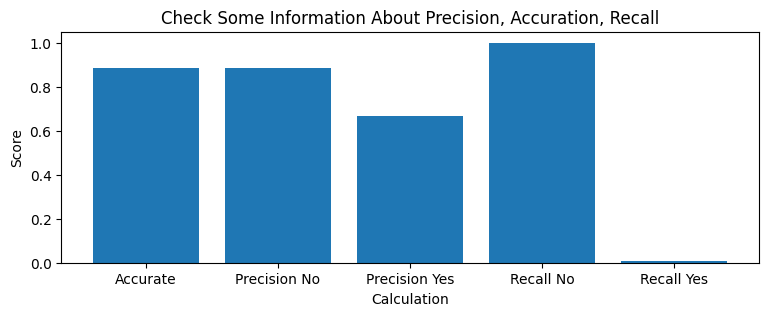

In [23]:
"""
Untuk SVM, saya menggunakan data bank yang kolomnya lebih sedikit
"""
model = svm.SVC().fit(bank_full_X_dummies, bank_full_y)
datas.append(modeling_function(model, bank_X_dummies, bank_y))

## DECISION TREE

In [24]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
import pydotplus
from six import StringIO # <-- direplace pakai ini  (xx from sklearn.externals.six import StringIO
from IPython.display import Image

In [25]:
def decision_tree_function(model):
    dot_data = StringIO()
    tree.export_graphviz(model,
                        out_file=dot_data,
                        class_names=['no', 'yes'], # the target names.
                        feature_names=bank_additional_full_X_dummies.columns, # the feature names.
                        filled=True, # Whether to fill in the boxes with colours.
                        rounded=True, # Whether to round the corners of the boxes.
                        special_characters=True,
                        max_depth=5
                        )
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

Data Prediksi :  ['no' 'no' 'no' ... 'no' 'no' 'no']
Accurate  :  0.9193979121145909
Precision No  :  0.9476650563607085
Precision Yes  :  0.6513994910941476
Recall No  :  0.962649945474373
Recall Yes  :  0.5676274944567627
Confusion Matrix : 
 [[3531  137]
 [ 195  256]]


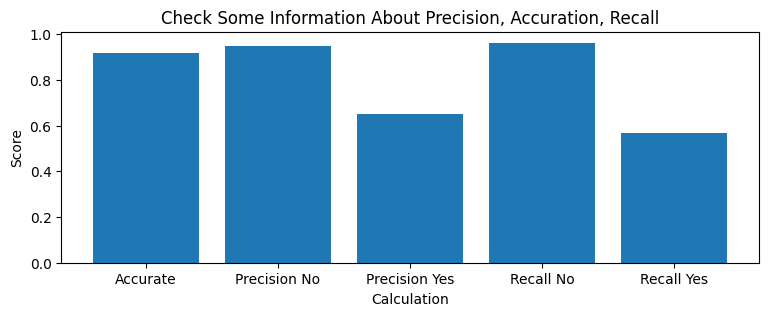

In [26]:
# Buat modelnya
model = DecisionTreeClassifier(max_depth=5).fit(bank_additional_full_X_dummies, bank_additional_full_y)
data_dt = []
data_dt.append(modeling_function(model))
# data_gb

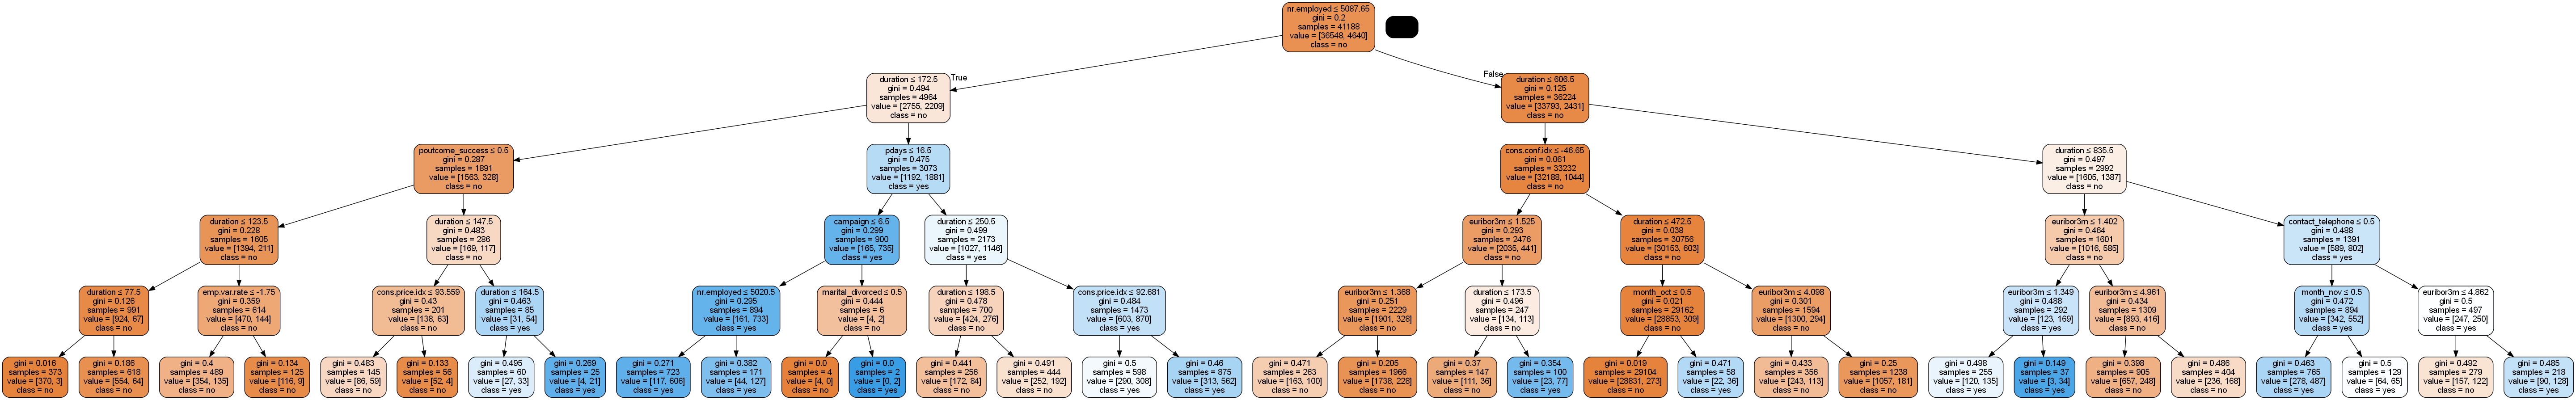

In [27]:
Image(decision_tree_function(model).create_png())

## Decision Tree Criterion Gini Split Random

Data Prediksi :  ['no' 'no' 'no' ... 'no' 'no' 'no']
Accurate  :  0.9147851420247632
Precision No  :  0.9478800972184716
Precision Yes  :  0.6201923076923077
Recall No  :  0.9569247546346783
Recall Yes  :  0.5720620842572062
Confusion Matrix : 
 [[3510  158]
 [ 193  258]]


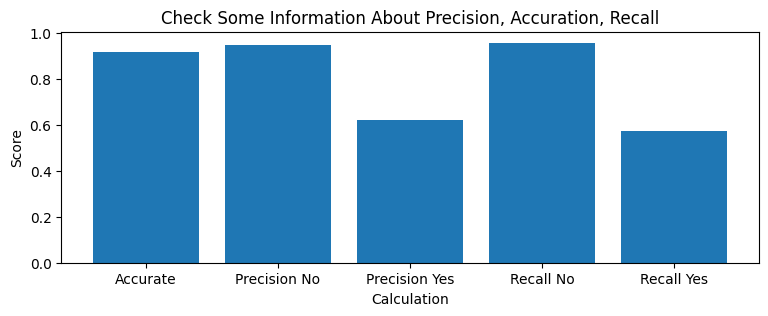

In [28]:
model = DecisionTreeClassifier(splitter='random', max_depth=5).fit(bank_additional_full_X_dummies, bank_additional_full_y)
data_dt.append(modeling_function(model))

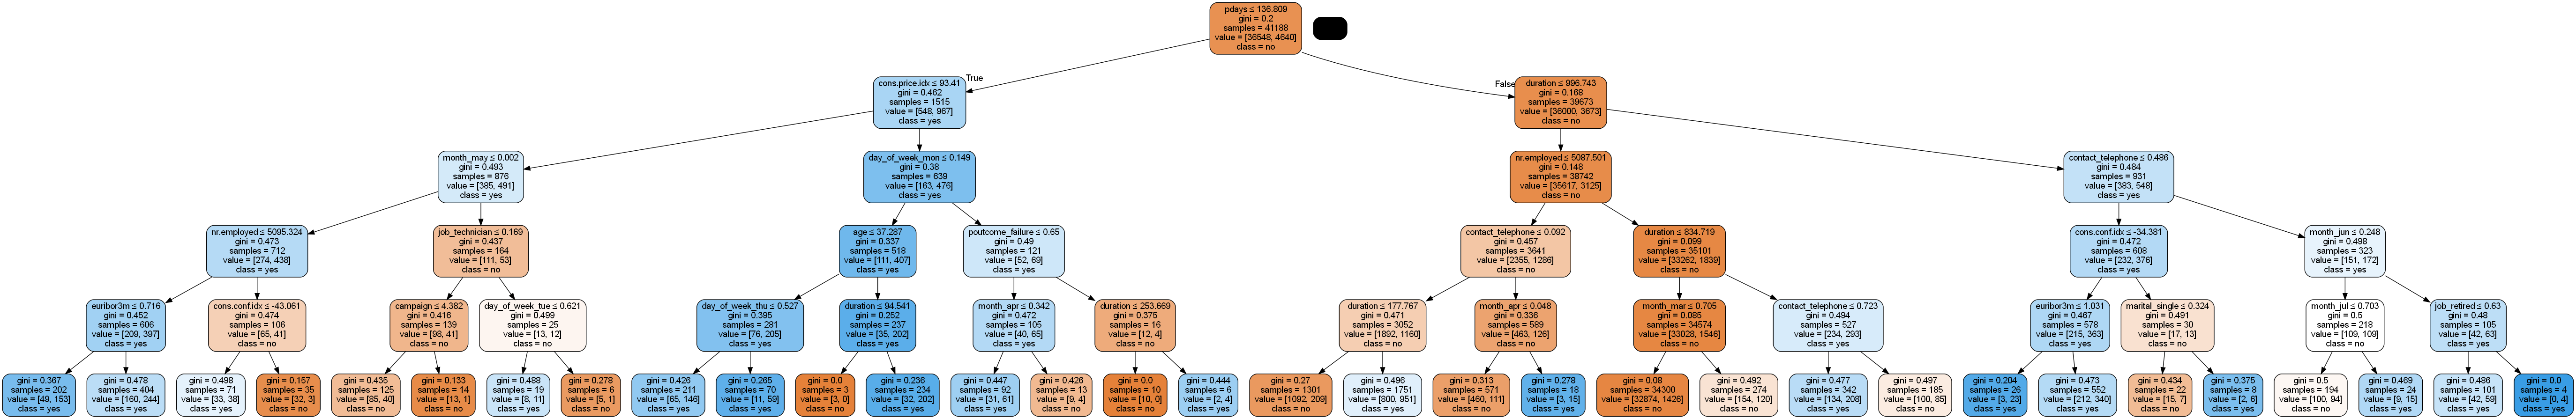

In [29]:
Image(decision_tree_function(model).create_png())

## Decision Tree Criterion Entropy Split Best

Data Prediksi :  ['no' 'no' 'no' ... 'no' 'no' 'no']
Accurate  :  0.9189123573682932
Precision No  :  0.9517615176151761
Precision Yes  :  0.6363636363636364
Recall No  :  0.9574700109051254
Recall Yes  :  0.6053215077605322
Confusion Matrix : 
 [[3512  156]
 [ 178  273]]


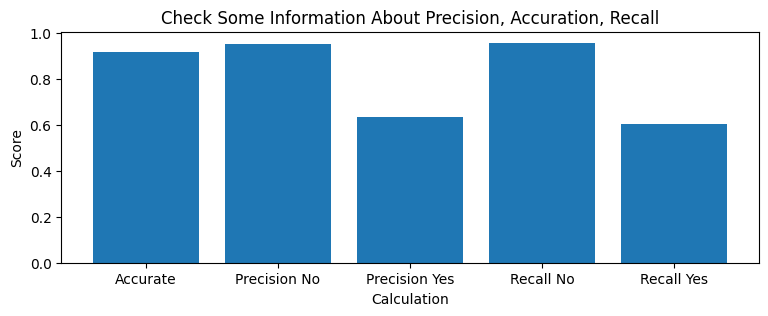

In [30]:
model = DecisionTreeClassifier(max_depth=5, criterion='entropy').fit(bank_additional_full_X_dummies, bank_additional_full_y)
data_dt.append(modeling_function(model))

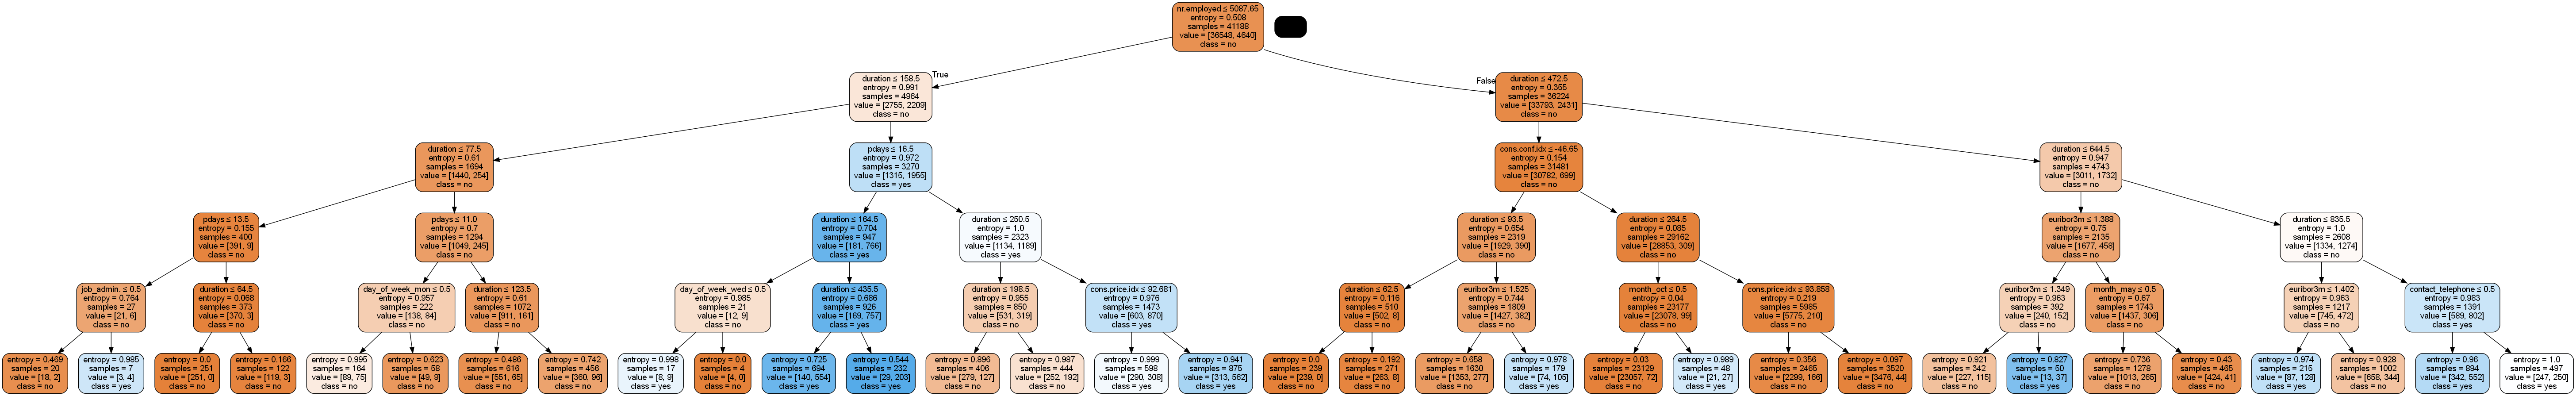

In [31]:
Image(decision_tree_function(model).create_png())

## Decision Tree Criterion Entropy Split Random

Data Prediksi :  ['no' 'no' 'no' ... 'no' 'no' 'no']
Accurate  :  0.9067734887108522
Precision No  :  0.9175991861648016
Precision Yes  :  0.679144385026738
Recall No  :  0.9836423118865867
Recall Yes  :  0.28159645232815966
Confusion Matrix : 
 [[3608   60]
 [ 324  127]]


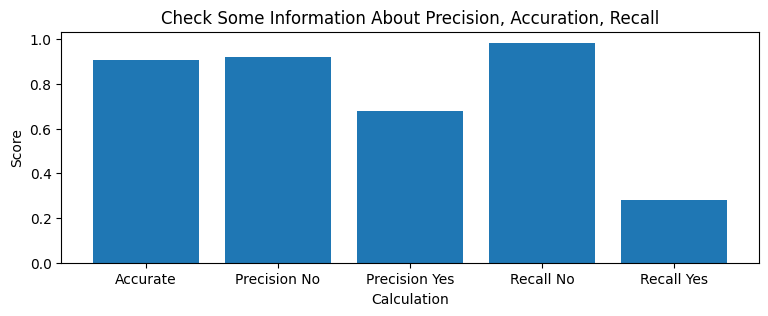

In [32]:
model = DecisionTreeClassifier(max_depth=5, criterion='entropy', splitter='random').fit(bank_additional_full_X_dummies, bank_additional_full_y)
data_dt.append(modeling_function(model))

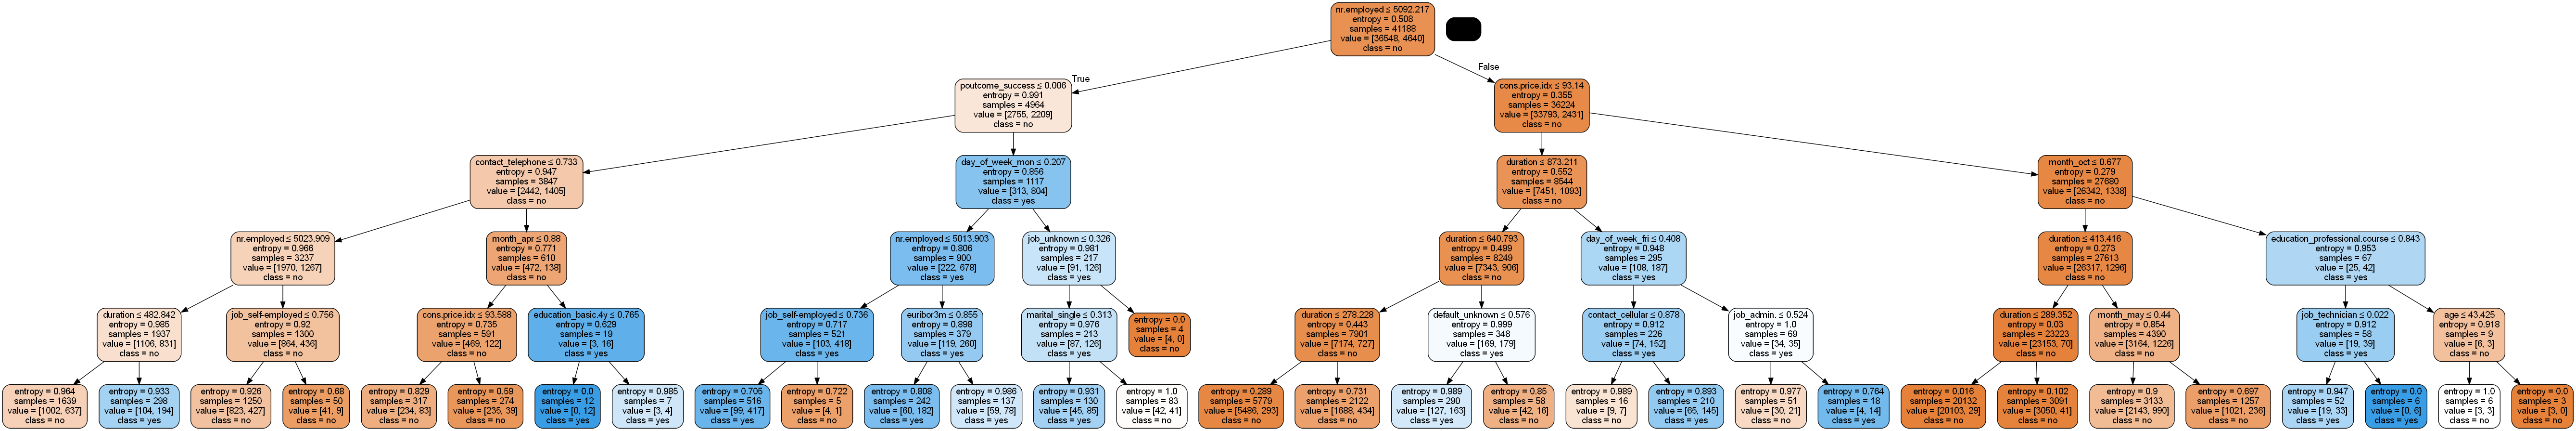

In [33]:
Image(decision_tree_function(model).create_png())

## Membandingkan Decision Tree Terbaik

In [34]:
# Kumpulin data ke data frame
dataset = {
    'Gini Best' : data_dt[0],
    'Gini Random' : data_dt[1],
    'Entropy Best' : data_dt[2],
    'Entropy Random' : data_dt[3],
    'Labels' : ['Accurate', 'Precision No', 'Precision Yes', 'Recall No', 'Recall Yes' ]
}
df = pd.DataFrame(data=dataset)
df.set_index('Labels', inplace=True)
datas.append(df['Entropy Best'].values)
df.head()

,Gini Best,Gini Random,Entropy Best,Entropy Random
Labels,,,,
Accurate,0.919398,0.914785,0.918912,0.906773
Precision No,0.947665,0.947880,0.951762,0.917599
Precision Yes,0.651399,0.620192,0.636364,0.679144
Recall No,0.962650,0.956925,0.957470,0.983642
Recall Yes,0.567627,0.572062,0.605322,0.281596


## RANDOM FOREST

In [35]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as skmet
data_rf = []

### Random Forest Criterion Gini

Data Prediksi :  ['no' 'no' 'no' ... 'no' 'no' 'no']
Accurate  :  0.9050740470988103
Precision No  :  0.9095226193451638
Precision Yes  :  0.7542372881355932
Recall No  :  0.9920937840785169
Recall Yes  :  0.1973392461197339
Confusion Matrix : 
 [[3639   29]
 [ 362   89]]


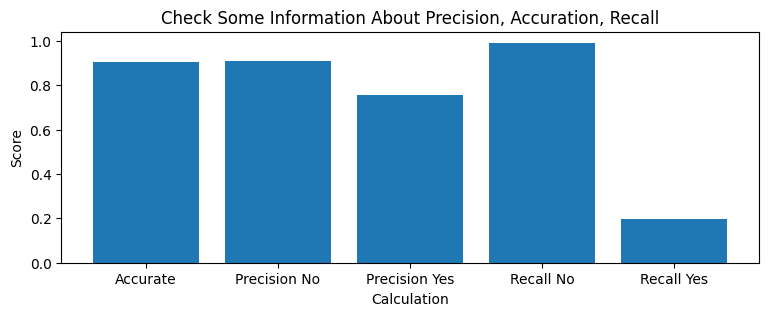

In [36]:
model = RandomForestClassifier(max_depth=5).fit(bank_additional_full_X_dummies, bank_additional_full_y)
data_rf.append(modeling_function(model))

### Random Forest Criterion Entropy

Data Prediksi :  ['no' 'no' 'no' ... 'no' 'no' 'no']
Accurate  :  0.9053168244719592
Precision No  :  0.9095452273863068
Precision Yes  :  0.7606837606837606
Recall No  :  0.9923664122137404
Recall Yes  :  0.1973392461197339
Confusion Matrix : 
 [[3640   28]
 [ 362   89]]


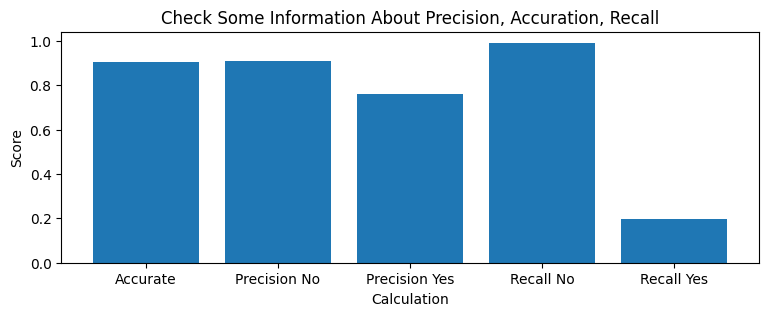

In [37]:
model = RandomForestClassifier(max_depth=5, criterion='entropy').fit(bank_additional_full_X_dummies, bank_additional_full_y)
data_rf.append(modeling_function(model))

## Membandingkan Random Forest Terbaik

In [38]:
dataset = {
    'Gini' : data_rf[0],
    'Entropy' : data_rf[1],
    'Labels' : ['Accurate', 'Precision No', 'Precision Yes', 'Recall No', 'Recall Yes' ]
}
df = pd.DataFrame(data=dataset)
df.set_index('Labels', inplace=True)
datas.append(df['Entropy'].values)
df.head()

,Gini,Entropy
Labels,,
Accurate,0.905074,0.905317
Precision No,0.909523,0.909545
Precision Yes,0.754237,0.760684
Recall No,0.992094,0.992366
Recall Yes,0.197339,0.197339


## NAIVE BAYES

In [39]:
from sklearn.naive_bayes import GaussianNB
import sklearn.metrics as skmet

Data Prediksi :  ['no' 'no' 'no' ... 'yes' 'no' 'no']
Accurate  :  0.8652585579024035
Precision No  :  0.9395650946060435
Precision Yes  :  0.4100346020761246
Recall No  :  0.9070338058887677
Recall Yes  :  0.5254988913525499
Confusion Matrix : 
 [[3327  341]
 [ 214  237]]


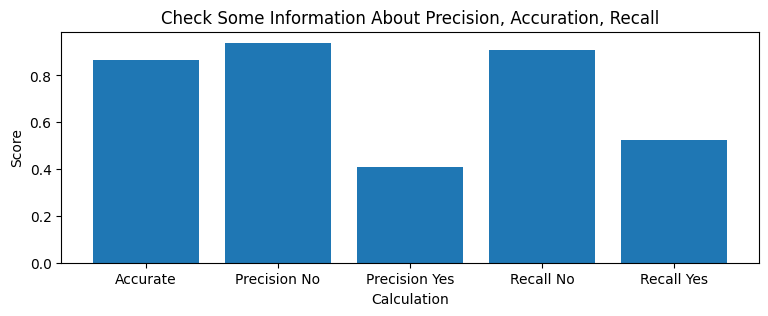

In [40]:
model = GaussianNB().fit(bank_additional_full_X_dummies, bank_additional_full_y)
datas.append(modeling_function(model))

In [41]:
dataset = {
    'Logistic Regression' : datas[0],
    'KNN' : datas[1],
    'SVM' : datas[2],
    'Decision Tree' : datas[3],
    'Random Forest' : datas[4],
    'Naive Byes' : datas[5],
    'Labels' : ['Accurate', 'Precision No', 'Precision Yes', 'Recall No', 'Recall Yes' ]
}
df = pd.DataFrame(data=dataset)
df.set_index('Labels', inplace=True)
df.head()

,Logistic Regression,KNN,SVM,Decision Tree,Random Forest,Naive Byes
Labels,,,,,,
Accurate,0.914542,0.931051,0.885202,0.918912,0.905317,0.865259
Precision No,0.931996,0.951682,0.885493,0.951762,0.909545,0.939565
Precision Yes,0.676157,0.723861,0.666667,0.636364,0.760684,0.410035
Recall No,0.975191,0.971919,0.999500,0.957470,0.992366,0.907034
Recall Yes,0.421286,0.598670,0.007678,0.605322,0.197339,0.525499


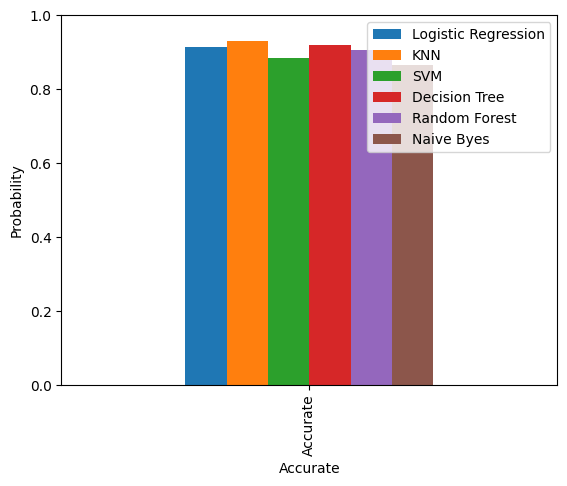

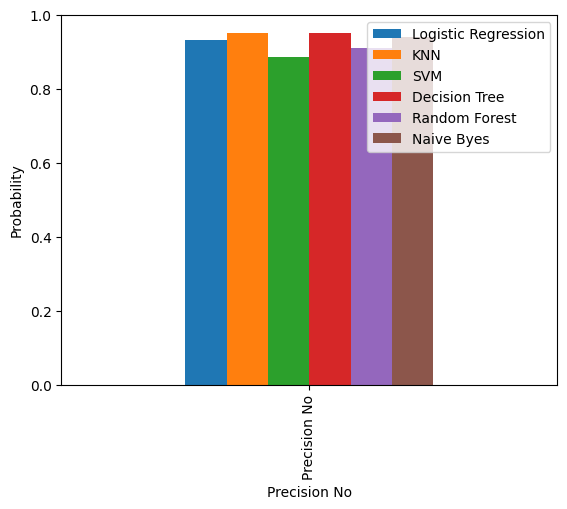

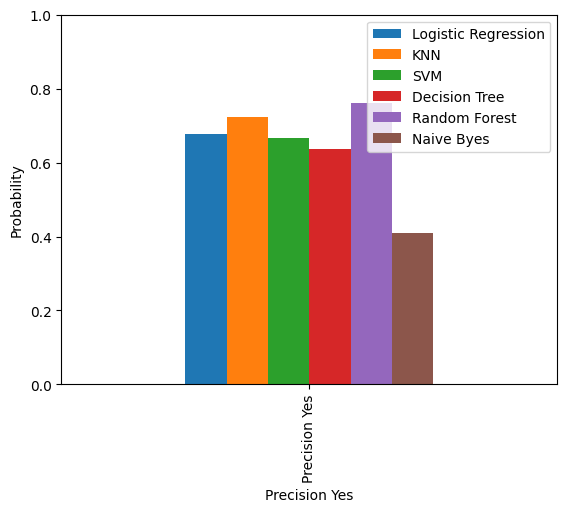

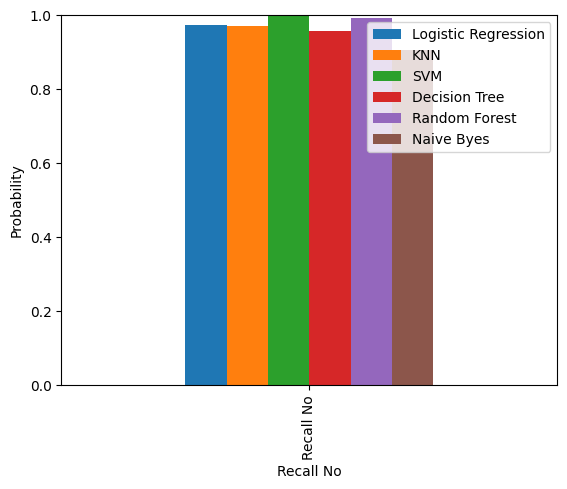

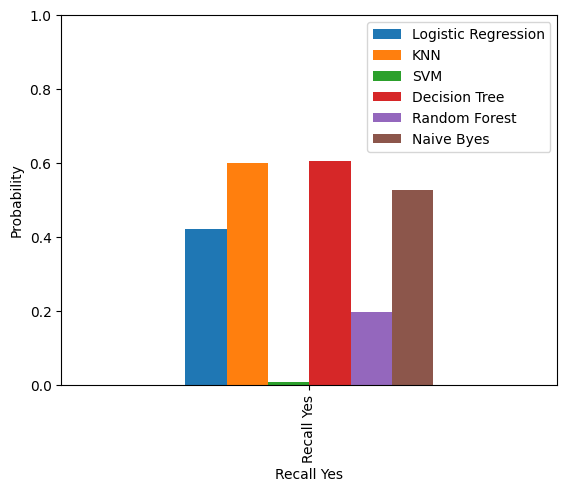

In [42]:
import matplotlib.pyplot as plt
for i in range(5):
    df.iloc[[i]].plot.bar()
    plt.xlabel(df.iloc[[i]].index[0])
    plt.ylabel('Probability')
    plt.ylim(0, 1.0)
    
    plt.show()

 Berdasarkan grafik di atas, hasilnya saya lebih memilih KNN sebagai algoritma terbaik dalam kasus ini karena probabilitas yang terbilang tinggi saat pengukuran akurasi, presisi, dan recall.